Tutorial 5 - Advanced 

Solutions to a Tri-diagonal matrix.

In this tute, we will
1. Practice matrix inversion
2. Create an auto-discretising matrix
3. Set boundary conditions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# Create our matrices
A = np.array([[-2.6,1,0,0],[1,-2.6,1,0],[0,1,-2.6,1],[0,0,1,-2.6]])
B = [-240,0,0,-150 ]

Text(0.5, 0, 'Arbitrary Points On line')

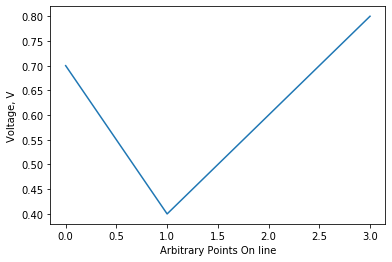

In [55]:
# First, let's try a hard-coded matrix. 
# We know the general pattern of the poisson equation matrix (see the tutorial image)
A = np.array([[-2, 1, 0, 0],[1, -2, 1, 0],[0, 1, -2, 1],[0, 0, 1, -2]])
# Let's put in our 'rho' vector; it needs to be the same length as the square matrix, so in this case it has 4 elements:
B = np.array([-1.0,0.5,0.0,-1.0]) # I have chosen random numbers for our rho.

# We can then perform matrix inversion to find the values for V at all four of our defined rho points:
V = np.linalg.solve(A,B) # This solves the equation Ax = B and returns x

#Let's plot it to see what it looks like
plt.plot(V)
plt.ylabel('Voltage, V')
plt.xlabel('Arbitrary Points On line')

So this is what the voltage looks like in our scenario. - Not very intuitive, but that's the solution. 

Let's try changing the boundary conditions of our system. 

[-1.5  0.5  0.   0. ]


Text(0.5, 0, 'Arbitrary Points On line')

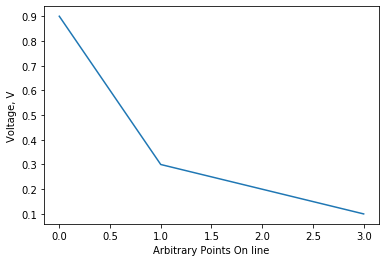

In [56]:
# Now at the moment, we are still hard-coding all of these changes; 
#We will look at doing them more automatically a LOT later down the line
V_start = 0.5
V_end = -1
# Modify our rho (B) vector
B_mod = np.copy(B)
B_mod[0] = B[0] - V_start
B_mod[-1] = B[-1] - V_end #[-1] means 'last'; having the - sign means count from the back of the vector
print(B_mod)

V = np.linalg.solve(A,B_mod) # This solves the equation Ax = B and returns x

#Let's plot it to see what it looks like
plt.plot(V)
plt.ylabel('Voltage, V')
plt.xlabel('Arbitrary Points On line')

[[-2  1  0  0]
 [ 1 -2  1  0]
 [ 0  1 -2  1]
 [ 0  0  1 -1]]


Text(0.5, 0, 'Arbitrary Points On line')

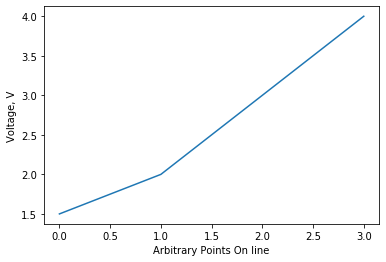

In [66]:
# If we want to modify our boundary conditions to set the gradient = 0 at the edges:
A_mod = np.copy(A)
# We want to edit the first or the last values of A to be -1
A_mod[0,0] = -2
A_mod[-1,-1] = -1

# Note that you can't actually modify both at once, or the matrix becomes singular; 
# This is because we made the poor choice to use a four-by-four matrix (should have made a bigger one)

print(A_mod)
V = np.linalg.solve(A_mod,B) # This solves the equation Ax = B and returns x

#Let's plot it to see what it looks like
plt.plot(V)
plt.ylabel('Voltage, V')
plt.xlabel('Arbitrary Points On line')

Things for you to do:
1. Make a system that automatically scales up the poisson matrix (and equation) to whatever size you want! Keep in mind that there is an a squared in the B vector (a is the step size - I have ignored it in my work).
2. Automate the gradient problem; have it so you can specify the gradient at the edges of the system, and the poisson matrix will automatically update. Note; you should practice this on paper first to figure out the correct mechanism!
